In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [52]:
import io

In [53]:
from google.colab import files
uploaded = files.upload()

Saving ERIE.csv to ERIE.csv


In [55]:
df = pd.read_csv(io.BytesIO(uploaded['ERIE.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   39.150002   39.560001   39.150002   39.349998   25.904909   
1      1/5/2010   39.540001   39.540001   38.540001   38.770000   25.523081   
2      1/6/2010   38.669998   38.790001   38.410000   38.779999   25.529673   
3      1/7/2010   38.540001   38.959999   38.500000   38.930000   25.628424   
4      1/8/2010   38.799999   38.980000   38.529999   38.810001   25.549421   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  184.309998  187.639999  183.720001  186.110001  171.158691   
2636  6/24/2020  186.350006  186.350006  182.009995  183.410004  168.675598   
2637  6/25/2020  183.289993  188.869995  181.199997  188.169998  173.053253   
2638  6/26/2020  187.380005  188.880005  184.899994  186.059998  171.112732   
2639  6/29/2020  187.619995  190.580002  187.520004  188.500000  173.356689   

         Average  
0      36.622982  
1      36.382

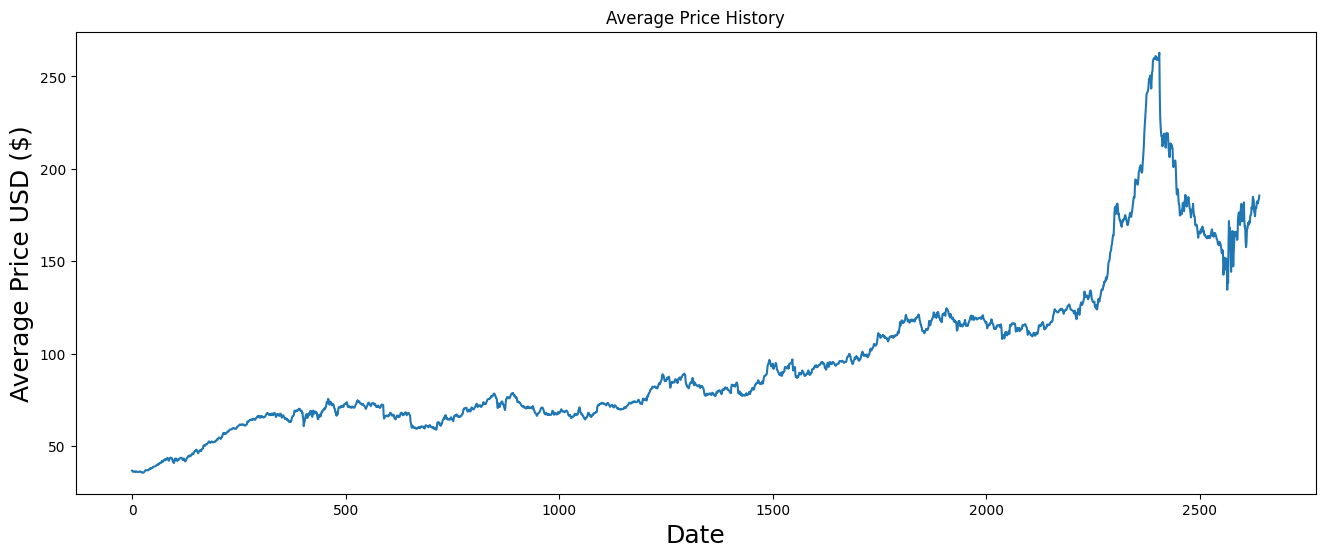

In [56]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [57]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2508

In [58]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2640


array([[-1.40011888],
       [-1.40577648],
       [-1.41393652],
       ...,
       [ 2.04326492],
       [ 2.06091567],
       [ 2.10443155]])

In [59]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-1.40011888, -1.40577648, -1.41393652, -1.41215354, -1.41163103,
       -1.4114427 , -1.41513375, -1.4124956 , -1.4109261 , -1.41574574,
       -1.41195271, -1.41155065, -1.41450451, -1.41727132, -1.4168034 ,
       -1.4159799 , -1.41271845, -1.41458496, -1.41193661, -1.40962289,
       -1.41134075, -1.41427034, -1.42138064, -1.42175524, -1.42642901,
       -1.42488257, -1.42646819, -1.42263356, -1.42006291, -1.41508598,
       -1.40607305, -1.39748855, -1.3935539 , -1.39400853, -1.39547573,
       -1.39444946, -1.39377906, -1.39678712, -1.39316477, -1.39187096,
       -1.3832406 , -1.37606012, -1.37025303, -1.37712555, -1.37498326,
       -1.36862935, -1.36921738, -1.36514023, -1.36470643, -1.35548133,
       -1.35065582, -1.34856607, -1.34761907, -1.34639164, -1.34484754,
       -1.34172092, -1.34081513, -1.33166816, -1.32798847, -1.32633497])]

 y_train [-1.3209931022080863]

x_train [array([-1.40011888, -1.40577648, -1.41393652, -1.41215354, -1.41163103,
       -1.4

In [60]:
print(x_train.shape[1])

60


In [61]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [62]:
import tensorflow as tf

In [63]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 60, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
77/77 [==============================] - 28s 264ms/step - loss: 0.0032
Epoch 2/50
77/77 [==============================] - 21s 272ms/step - loss: 0.0035
Epoch 3/50
77/77 [==============================] - 20s 257ms/step - loss: 0.0026
Epoch 4/50
77/77 [==============================] - 21s 273ms/step - loss: 0.0030
Epoch 5/50
77/77 [==============================] - 22s 280ms/step - loss: 0.0028
Epoch 6/50
77/77 [==============================] - 20s 258ms/step - loss: 0.0026
Epoch 7/50
77/77 [==============================] - 21s 275ms/step - loss: 0.0036
Epoch 8/50
77/77 [==============================] - 21s 267ms/step - loss: 0.0025
Epoch 9/50
77/77 [==============================] - 21s 266ms/step - loss: 0.0032
Epoch 10/50
77/77 [==============================] - 22s 281ms/step - loss: 0.0024
Epoch 11/50
77/77 [==============================] - 20s 260ms/step - loss: 0.0024
Epoch 12/50
77/77 [==============================] - 21s 273ms/step - loss: 0.0030
Epoch 13/50
7

In [66]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  192
5/5 [==============================] - 2s 117ms/step


7.22202916564534

<ipython-input-67-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


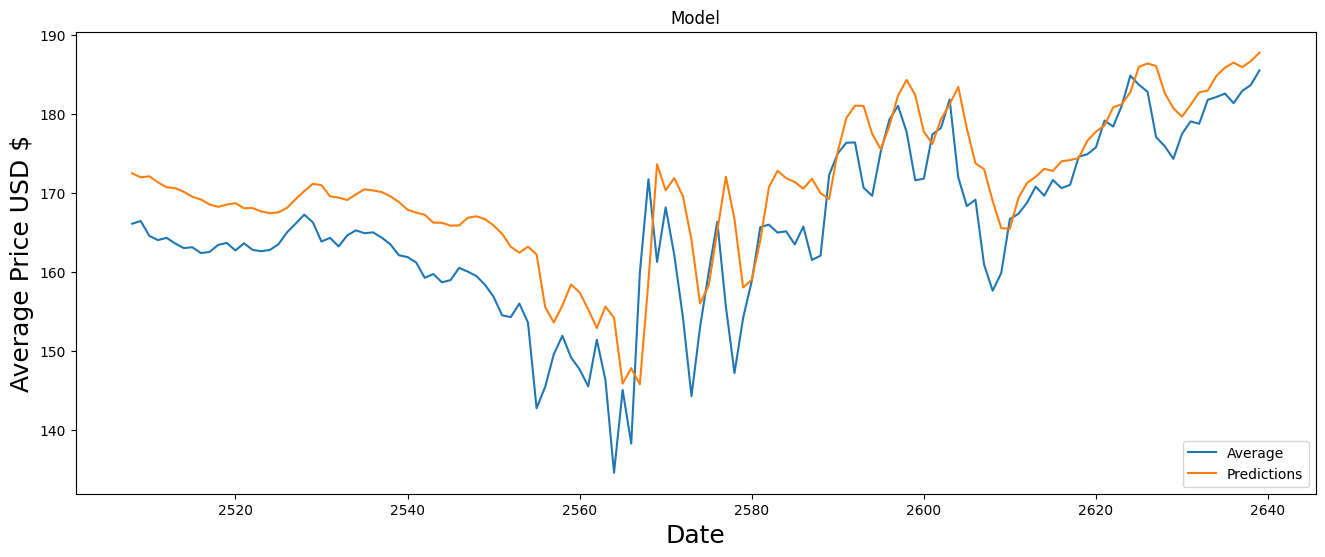

In [67]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [68]:
test[:]

,Average,Predictions
2508,166.098047,172.487061
2509,166.439832,171.969498
2510,164.552350,172.101639
2511,164.021555,171.334930
2512,164.309207,170.719543
...,...,...
2635,182.587738,185.877655
2636,181.359122,186.502960
2637,182.916647,185.921356
2638,183.666547,186.695526
